In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
%matplotlib inline

july = pd.read_csv('tomslee_airbnb_new_york_1438_2017-07-12.csv')
july = july.drop(['room_id','survey_id', 'host_id', 'country', 'city', 'bathrooms', 'minstay', 'last_modified', 'location', 'name'], 1)
#remove listings we already know are outliers (price greater than 500 and rooms at 50)
july = july[july.price < 500]
july = july[july.bedrooms < 50]

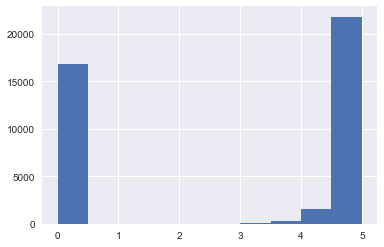

In [13]:
plt.hist(july.overall_satisfaction)
plt.show()

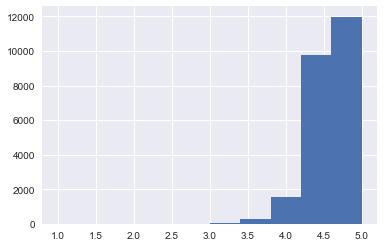

mean= 4.704009633260098
median= 5.0


In [14]:
ratings = july[july.overall_satisfaction > 0].overall_satisfaction

plt.hist(ratings)
plt.show()
print('mean=', np.mean(ratings))
print('median=', np.median(ratings))

In [15]:
july.overall_satisfaction = july.overall_satisfaction.replace(0, np.mean(ratings))

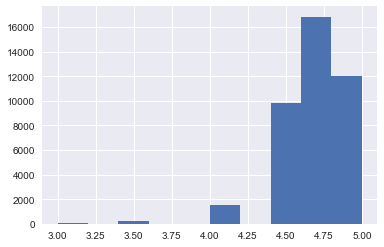

diff = 2.0
mean = 4.705338261561146


In [16]:
ratings = july[july.overall_satisfaction >= 3].overall_satisfaction
rate_diff = np.max(ratings) - np.min(ratings)
plt.hist(ratings)
plt.show()
print('diff =', rate_diff)
print('mean =', np.mean(ratings))

In [20]:
from sklearn import preprocessing

july.info()
#take out low rated listings as they spread out the ratings too much.
july = july[july.overall_satisfaction >= 3]
july_y = july.price
july = july.drop('price',1)
july_x = pd.get_dummies(july, drop_first=True)

scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(july_x)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40502 entries, 0 to 41244
Data columns (total 11 columns):
room_type               40502 non-null object
borough                 40502 non-null object
neighborhood            40502 non-null object
reviews                 40502 non-null int64
overall_satisfaction    40502 non-null float64
accommodates            40502 non-null int64
bedrooms                40502 non-null float64
price                   40502 non-null float64
property_type           40502 non-null object
latitude                40502 non-null float64
longitude               40502 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 3.7+ MB


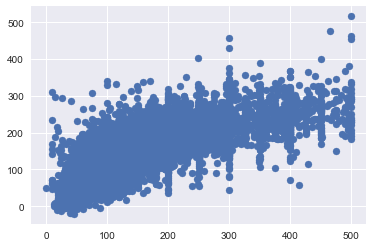

In [21]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,july_y)
predicted_prices= lm.predict(X_train)

plt.scatter(x=july_y, y=predicted_prices)
plt.show()

In [ ]:
#by standardizing my data and removing outliers (low rated, over-priced, and over-roomed listings) I get a much thinner
#prediction graph, with lower priced properties falling along the 1:1 line and the higher priced listings falling below
#the 1:1 line (meaning the lower priced listings are probably more reasonably priced and the higher priced listings are
#probably overpriced)